# END TO END STEPS TO PREDICTION OF CHURN OF A TELCO DATA

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [47]:
telco_df = pd.read_csv("Telcochurn.csv")

In [48]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [50]:
numerical_columns  = telco_df.select_dtypes(include = 'number')
numerical_columns

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [51]:
categorical_columns  = telco_df.select_dtypes(exclude = 'number')
categorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


## Data cleaning & Data exploration

In [52]:
#column Totalcharges is coming out as categorical column instead of numerical
#converting to numerical

telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors= 'coerce')

In [53]:
#converting column "SeniorCitizen" to a categorical variable
telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].astype("category")

In [54]:
telco_df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [55]:
numerical_columns  = telco_df.select_dtypes(include = 'number')
numerical_columns

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [56]:
categorical_columns  = telco_df.select_dtypes(exclude = 'number')
categorical_columns

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [57]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [58]:
if True in telco_df['TotalCharges'].isna():
    print("true")
else:
    print("false")

false


In [59]:
total_missing_values = telco_df['TotalCharges'].isna().sum()
total_missing_values

11

In [64]:
#filling the missing values with 0
telco_df['TotalCharges'] = telco_df['TotalCharges'].fillna(0)

#Alternatively the line below wil work if not assigning to a new variable
#telco_df['TotalCharges'].fillna(0, inplace = True)

In [65]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [66]:
telco_df['TotalCharges'].isna().sum()

0

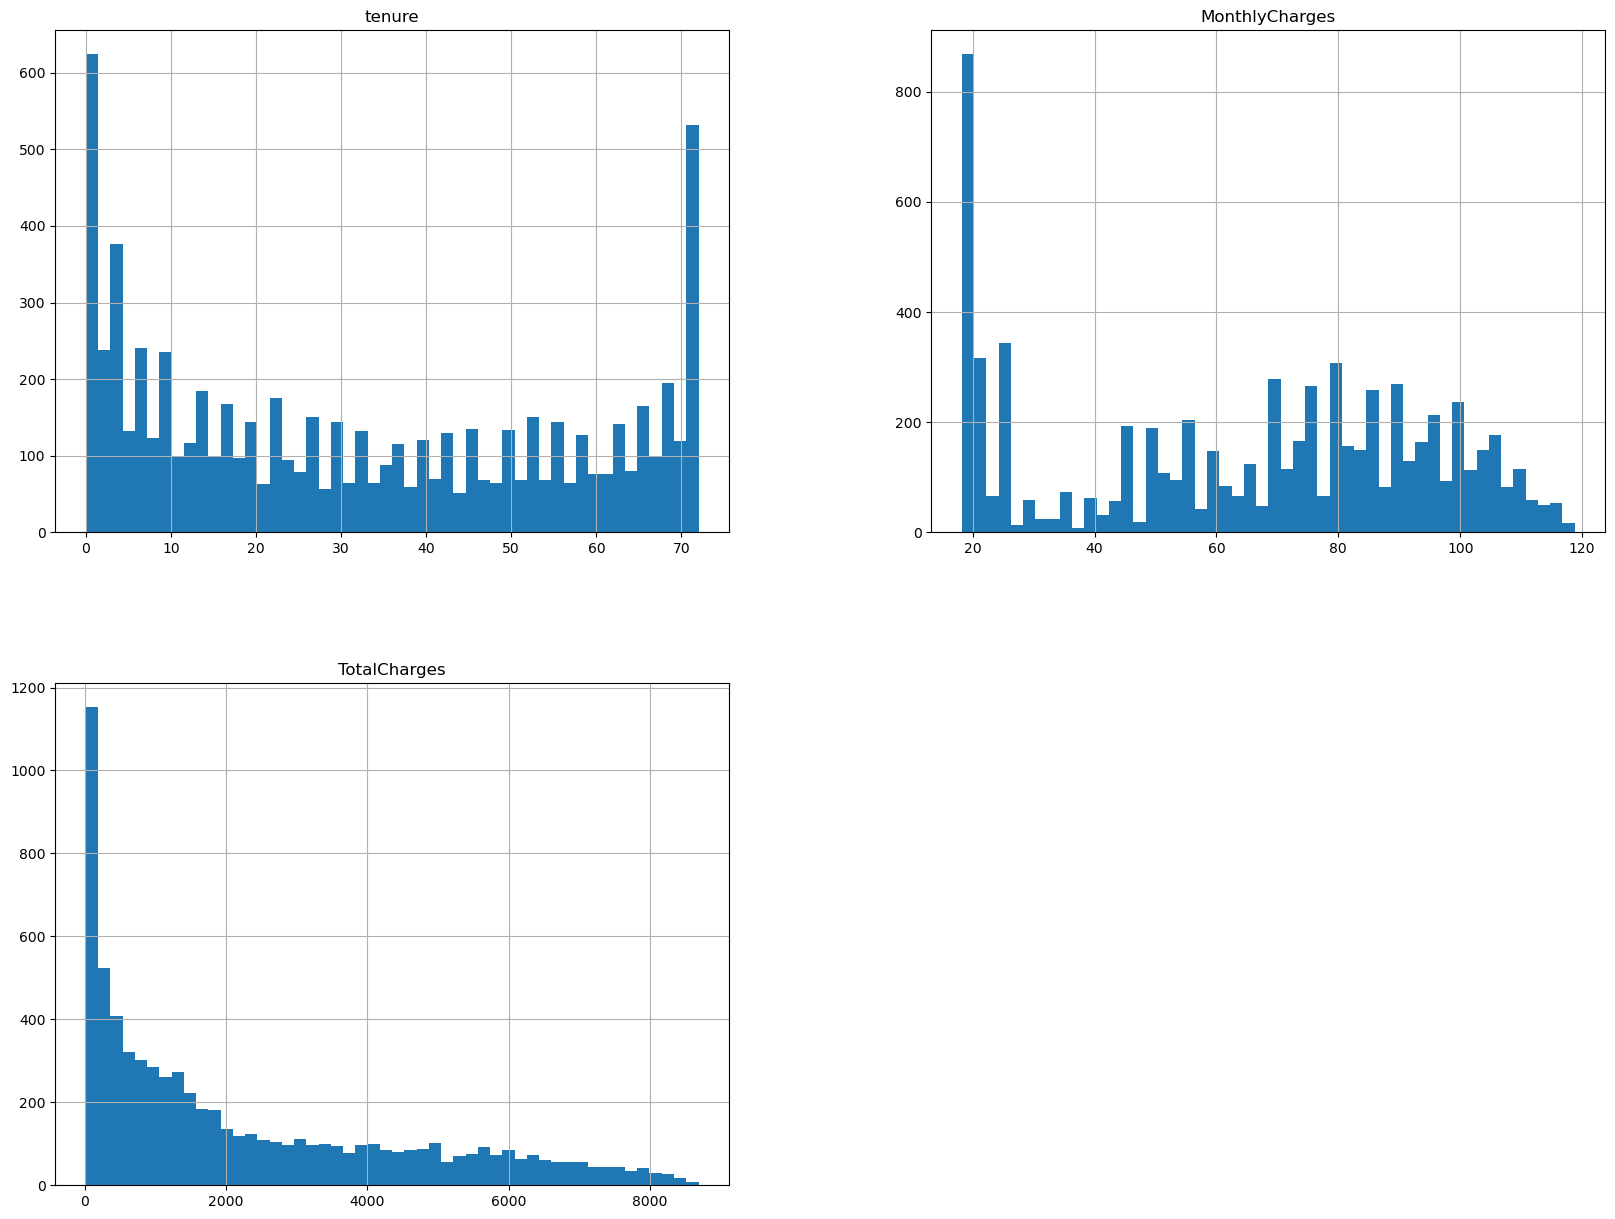

In [69]:
# %matplotlib inline
numerical_columns.hist(bins=50, figsize=(20,15))
plt.show()

In [76]:
#dropping customer ID column as a feature
#telco_df = telco_df.drop('customerID', axis = 1)
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [79]:
telco_label = telco_df['Churn'].copy()
telco_feature = telco_df.drop('Churn', axis = 1)

stratified_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in stratified_split.split(telco_feature, telco_label):
    X_train, X_test = telco_feature.iloc[train_index], telco_feature.iloc[test_index]
    y_train, y_test = telco_label.iloc[train_index], telco_label.iloc[test_index]

In [86]:
#Divide the training data into numerical and categorical feature
train_num = X_train.select_dtypes(include = 'number')
train_cat = X_train.select_dtypes(exclude = 'number')

## Creating a transformation pipeline for both the numerical & categorical feature

In [98]:
#Extracting the column names for the numerical & categorical columns
train_num_colnames = list(train_num)
train_cat_colnames = list(train_cat)

In [102]:

#imputer = SimpleImputer(strategy = 'constant', fill_value = 0)


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'constant', fill_value = 0)),
                          ('std_scaler', StandardScaler()),])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_num_colnames),
        ("cat", OneHotEncoder(), train_cat_colnames),
    ])

In [109]:
#Applying the full pipeline on the trainset without the label

Xtrain_prepared = full_pipeline.fit_transform(X_train)

In [111]:
Xtrain_prepared

array([[ 0.10237124, -0.52197565, -0.2622572 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.71174346,  0.33747781, -0.50363479, ...,  0.        ,
         0.        ,  1.        ],
       [-0.79315493, -0.80901319, -0.74988292, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.30468611,  1.25666162,  0.15834357, ...,  0.        ,
         0.        ,  1.        ],
       [-0.34539184, -1.47766135, -0.79707463, ...,  1.        ,
         0.        ,  0.        ],
       [-1.07809507, -1.46936546, -0.96096216, ...,  0.        ,
         0.        ,  1.        ]])

In [108]:
y_train

3738     No
3151     No
4860     No
3867     No
3810     No
       ... 
6303     No
6227    Yes
4673    Yes
2710     No
5639     No
Name: Churn, Length: 5634, dtype: object

In [112]:
#Transoforming the target variable
lb = LabelBinarizer()
Ytrain_prepared = lb.fit_transform(y_train)

In [113]:
Ytrain_prepared

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

## Training the data 

In [106]:
logreg =  LogisticRegression(solver='newton-cholesky')

In [116]:
logreg.fit(Xtrain_prepared, Ytrain_prepared.ravel()) 

LogisticRegression(solver='newton-cholesky')

In [118]:
y_pred=logreg.predict(Xtrain_prepared)

In [119]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Testing the result

In [122]:
cnf_matrix = metrics.confusion_matrix(Ytrain_prepared, y_pred)

In [123]:
cnf_matrix

array([[3718,  421],
       [ 674,  821]], dtype=int64)

In [125]:
print("Accuracy:",metrics.accuracy_score(Ytrain_prepared, y_pred))

Accuracy: 0.8056443024494143


In [128]:
## Using cross validation
cross_val_score(logreg, Xtrain_prepared, Ytrain_prepared.ravel(), cv=3, scoring="accuracy")

array([0.8200213 , 0.80085197, 0.79073482])